In [16]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Get one year of data

In [3]:
file_path = 'NVDA_data.csv'

df = pd.read_csv(file_path)

print(df)

            date     open      high     low   close    volume  Name
0     2013-02-08   12.370   12.4699   12.29   12.37   7677336  NVDA
1     2013-02-11   12.470   12.6350   12.35   12.51  10207599  NVDA
2     2013-02-12   12.395   12.5650   12.38   12.43   6945065  NVDA
3     2013-02-13   12.440   12.6650   12.33   12.37  21322573  NVDA
4     2013-02-14   12.200   12.7400   12.05   12.73  22049335  NVDA
...          ...      ...       ...     ...     ...       ...   ...
1254  2018-02-01  238.520  246.9000  238.06  240.50  12980572  NVDA
1255  2018-02-02  237.000  237.9700  231.17  233.52  17961555  NVDA
1256  2018-02-05  227.000  233.2300  205.00  213.70  29130140  NVDA
1257  2018-02-06  204.400  225.7000  204.00  225.58  27870031  NVDA
1258  2018-02-07  229.580  234.9700  226.70  228.80  20073316  NVDA

[1259 rows x 7 columns]


In [9]:
# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

desired_year = 2015

year_data = df[df['date'].dt.year == desired_year]

print(year_data)

          date   open   high     low   close   volume  Name
478 2015-01-02  20.13  20.28  19.811  20.130  2842012  NVDA
479 2015-01-05  20.13  20.19  19.700  19.790  4948799  NVDA
480 2015-01-06  19.82  19.84  19.170  19.190  4944121  NVDA
481 2015-01-07  19.33  19.50  19.080  19.135  8045186  NVDA
482 2015-01-08  19.36  19.98  19.350  19.860  7094534  NVDA
..         ...    ...    ...     ...     ...      ...   ...
725 2015-12-24  32.96  33.25  32.910  33.170  1311231  NVDA
726 2015-12-28  32.82  33.14  32.360  33.140  3550703  NVDA
727 2015-12-29  33.16  33.78  33.070  33.680  5091512  NVDA
728 2015-12-30  33.65  33.94  33.380  33.390  4508570  NVDA
729 2015-12-31  33.34  33.49  32.960  32.960  3713202  NVDA

[252 rows x 7 columns]


In [10]:
print("Number of rows:", year_data.shape[0])

Number of rows: 252


Compute log returns

In [11]:
log_returns = np.log(year_data.close/year_data.close.shift(1)).dropna()
log_returns

479   -0.017034
480   -0.030787
481   -0.002870
482    0.037189
483    0.004020
         ...   
725    0.003473
726   -0.000905
727    0.016163
728   -0.008648
729   -0.012962
Name: close, Length: 251, dtype: float64

Caculate daily standard deviation of returns

In [12]:
daily_std = log_returns.std()
daily_std 

0.021388976943586723

In [13]:
annualized_vol = daily_std * np.sqrt(252)
annualized_vol*100 #Volatility in a year in percentage

33.95394827449493

Rolling Volatility

In [14]:
TRADING_DAYS = 60
volatility = log_returns.rolling(window = TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

<Axes: title={'center': 'Volatility'}>

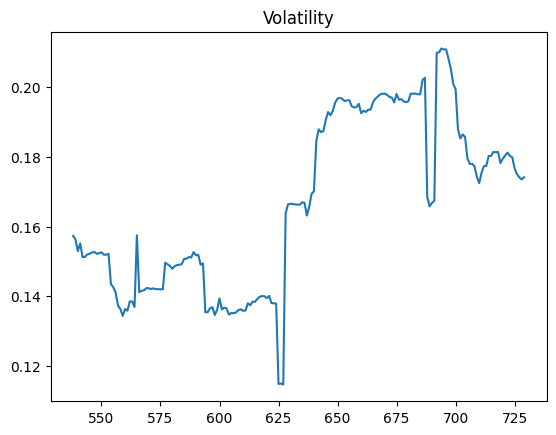

In [17]:
volatility.plot(title = 'Volatility')


In [18]:
Rf = 0.01/255
sortino_vol = log_returns[log_returns<0].rolling(window=TRADING_DAYS, center=True, min_periods=10).std()*np.sqrt(TRADING_DAYS)
sortino_ratio = (log_returns.rolling(window=TRADING_DAYS).mean() - Rf)*TRADING_DAYS / sortino_vol

In [19]:
sortino_ratio

479         NaN
480         NaN
481         NaN
482         NaN
483         NaN
         ...   
725         NaN
726    4.508849
727         NaN
728    3.937110
729    3.555562
Name: close, Length: 251, dtype: float64

AttributeError: 'Axes' object has no attribute 'show'

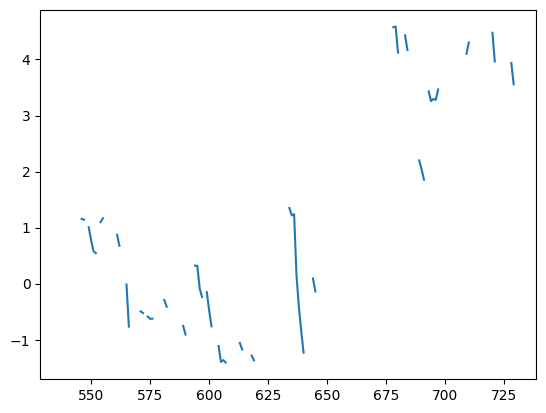

In [21]:
sortino_ratio.plot().show(renderer="colab")

In [ ]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

In [35]:
##print(year_data)

new_df = year_data['close'].pct_change().dropna()

new_df['Port'] = new_df.mean(axis = 0) # 20% apple, ... , 20% facebook
# (new_df+1).cumprod().plot()

# print((new_df+1).cumprod()[-1:])



In [36]:
new_df.head()

479   -0.016890
480   -0.030318
481   -0.002866
482    0.037889
483    0.004028
Name: close, dtype: float64

In [38]:
N=255
rf=0.01

mean = log_returns.mean() * N -rf
std_neg = log_returns[log_returns<0].std()*np.sqrt(N)
mean/std_neg

2.448100689513532

In [39]:
file_path = 'output_file.csv'

df = pd.read_csv(file_path)

print(df)

     Volatility
0     37.515407
1     26.781608
2     31.403969
3     32.166698
4     16.822405
..          ...
500   20.899655
501   33.632124
502   20.436762
503   27.742614
504   29.626430

[505 rows x 1 columns]


In [41]:
def label_value(value):
    if value > 40:
        return 1
    else:
        return 0

# Apply the function to create a new column
df['risky'] = df['Volatility'].apply(label_value)

print(df)

     Volatility  risky
0     37.515407      0
1     26.781608      0
2     31.403969      0
3     32.166698      0
4     16.822405      0
..          ...    ...
500   20.899655      0
501   33.632124      0
502   20.436762      0
503   27.742614      0
504   29.626430      0

[505 rows x 2 columns]


In [ ]:
df.to_csv('feature_and_target.csv', index=False)

In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots




In [2]:
df = pd.read_csv('C:/Users/andre/Documents/.MS/Spring 2024/Machine Learning 5215/Project/output_file.csv')
df

,Volatility
0,37.515407
1,26.781608
2,31.403969
3,32.166698
4,16.822405
...,...
500,20.899655
501,33.632124
502,20.436762
503,27.742614


In [33]:
import pandas as pd
import numpy as np

# Creating a sample DataFrame
data = {'Volatility': [0.35, 0.45, 0.6, 0.8, 0.9]}
df = pd.DataFrame(data)

# Define the function to calculate the probability
def calculate_probability(volatility):
    base_probability = 0.6  # Base probability for volatility < 40%
    
    # Adjust the base probability based on volatility
    probability = base_probability + (volatility - 0.4) * 0.3
    
    # Ensure probability is capped at 1
    probability = min(probability, 1)
    
    return probability

# Add a new column based on the probability
df['New_Column'] = np.random.rand(len(df)) < df['Volatility'].apply(calculate_probability)

print(df)

   Volatility  New_Column
0        0.35       False
1        0.45        True
2        0.60        True
3        0.80        True
4        0.90        True


In [37]:
import numpy as np

def add_noise(labels, noise_level):
    """
    Adds noise to classification labels.
    
    Parameters:
        labels (array-like): Original labels.
        noise_level (float): The percentage of labels to flip (0 to 1).
        
    Returns:
        array-like: Labels with added noise.
    """
    num_samples = len(labels)
    num_to_flip = int(noise_level * num_samples)
    print(num_to_flip)
    
    # Randomly choose indices to flip
    flip_indices = np.random.choice(num_samples, num_to_flip, replace=False)
    print(flip_indices)
    
    # Flip the labels at selected indices
    noisy_labels = np.copy(labels)
    noisy_labels[flip_indices] = 1 - noisy_labels[flip_indices]
    
    return noisy_labels

# Example usage:
original_labels = np.array([0, 1, 0, 1, 0, 1, 0, 1])  # Example original labels
noise_level = 0.5  # Example noise level (20% of labels to flip)

noisy_labels = add_noise(original_labels, noise_level)
print("Original labels:", original_labels)
print("Noisy labels:", noisy_labels)

4
[1 5 2 3]
Original labels: [0 1 0 1 0 1 0 1]
Noisy labels: [0 0 1 0 0 0 0 1]
